### 10. Diverging Bars
If you want to see how the items are varying based on a single metric and visualize the order and amount of this variance, the diverging bars is a great tool. It helps to quickly differentiate the performance of groups in your data and is quite intuitive and instantly conveys the point.

In [1]:
!pip install statsmodels
!pip install brewer2mpl
!pip install matplotlib
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

0     0.223563
1     0.223563
2     0.514515
3     0.289265
4    -0.167015
5    -0.272803
6    -0.988049
7     0.763633
8     0.514515
9    -0.080149
10   -0.326355
11   -0.582449
12   -0.416620
13   -0.810803
14   -1.829979
15   -1.829979
16   -0.908604
17    1.901770
18    1.631810
19    2.098811
20    0.305594
21   -0.752894
22   -0.810803
23   -1.191664
24   -0.080149
25    1.195169
26    1.004708
27    1.631810
28   -0.695542
29    0.005594
30   -0.849728
31    0.289265
Name: mpg_z, dtype: float64


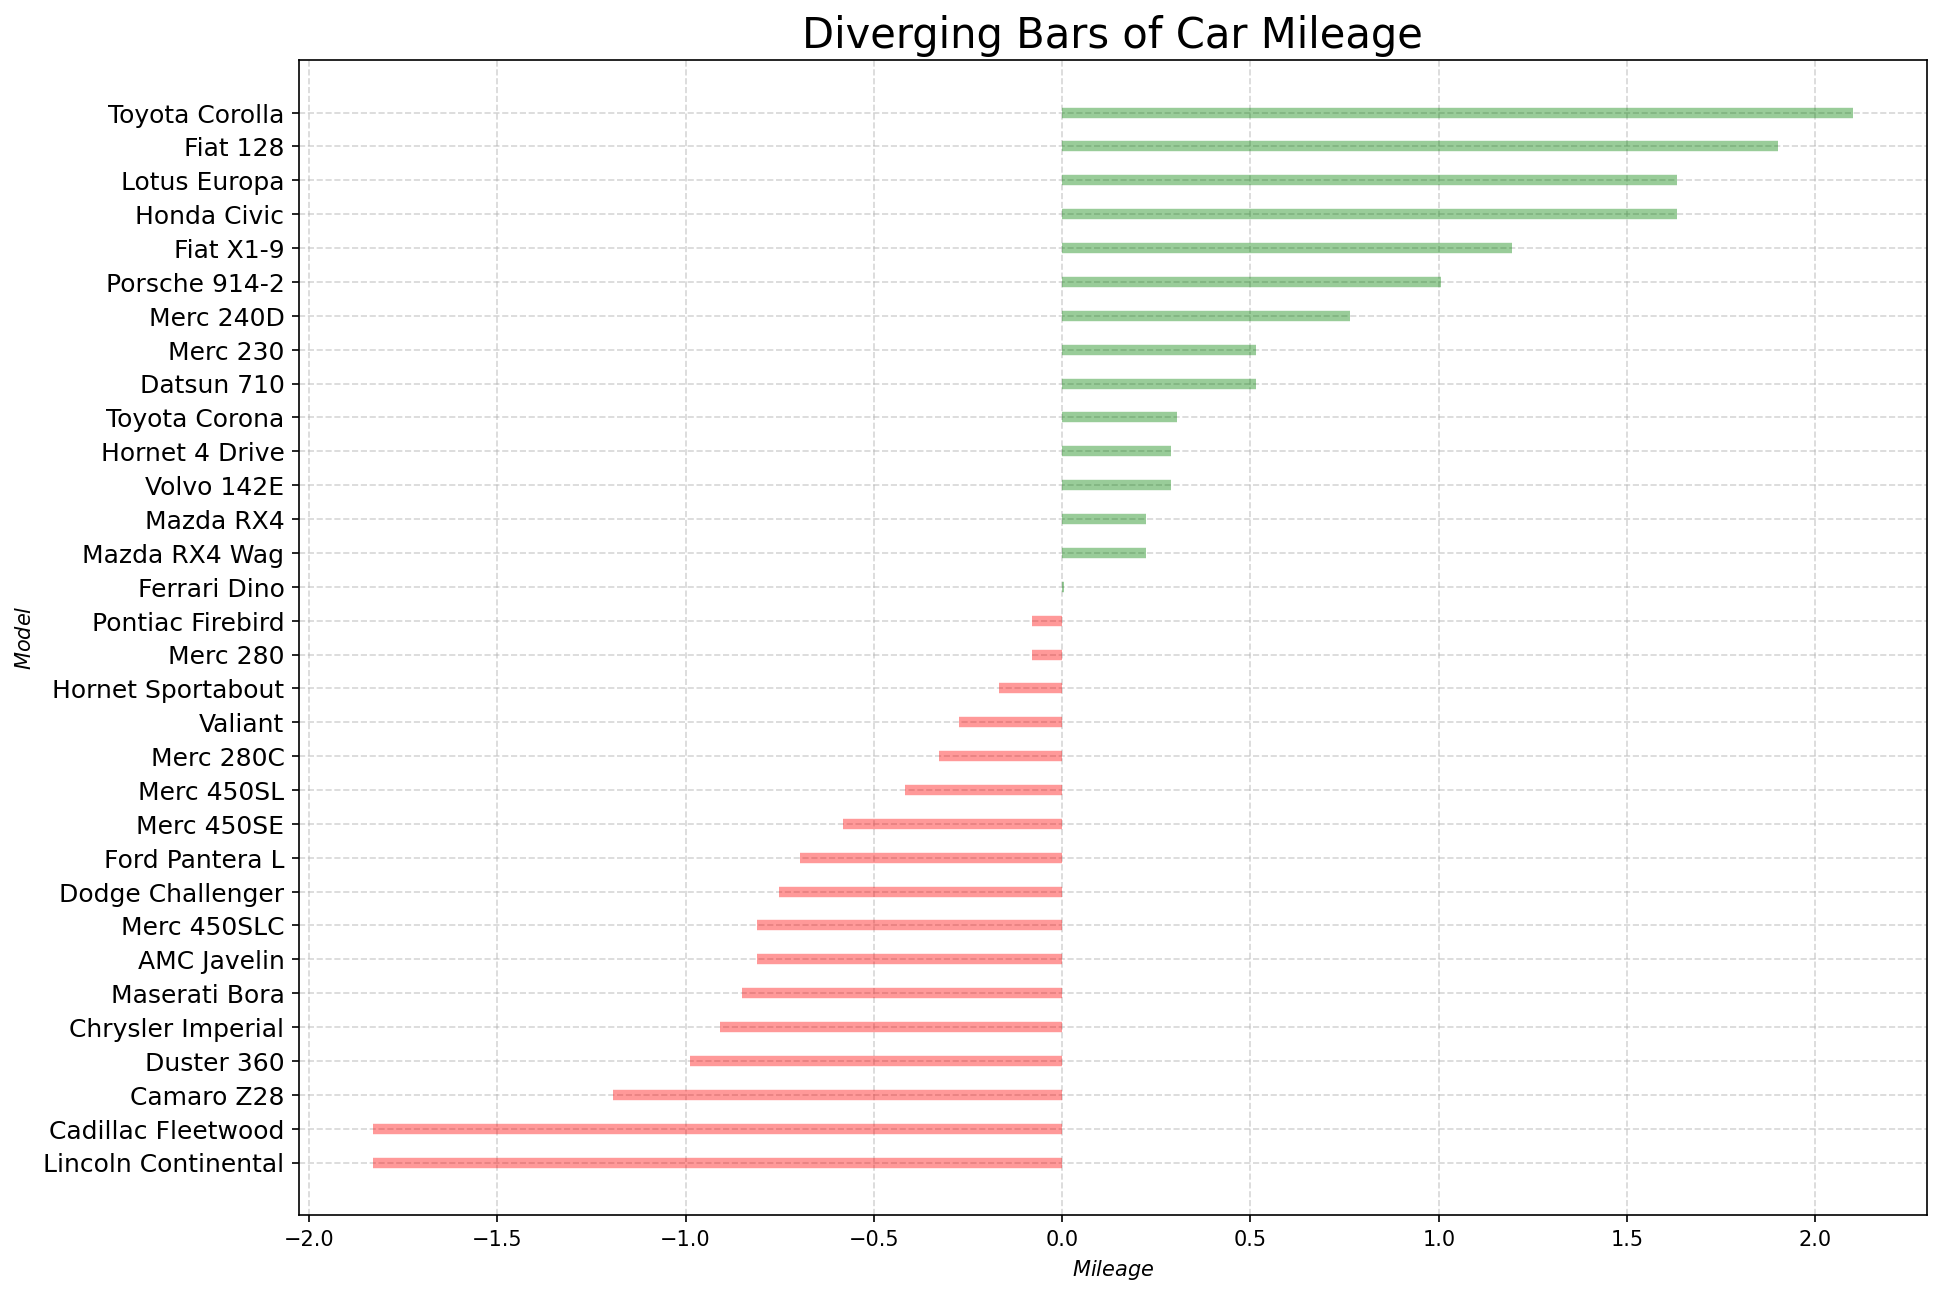

In [3]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]

df['mpg_z'] = (x - x.mean())/x.std()
print(df['mpg_z'])
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 150)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

### 11. Diverging Texts
iverging texts is similar to diverging bars and it preferred if you want to show the value of each items within the chart in a nice and presentable way.

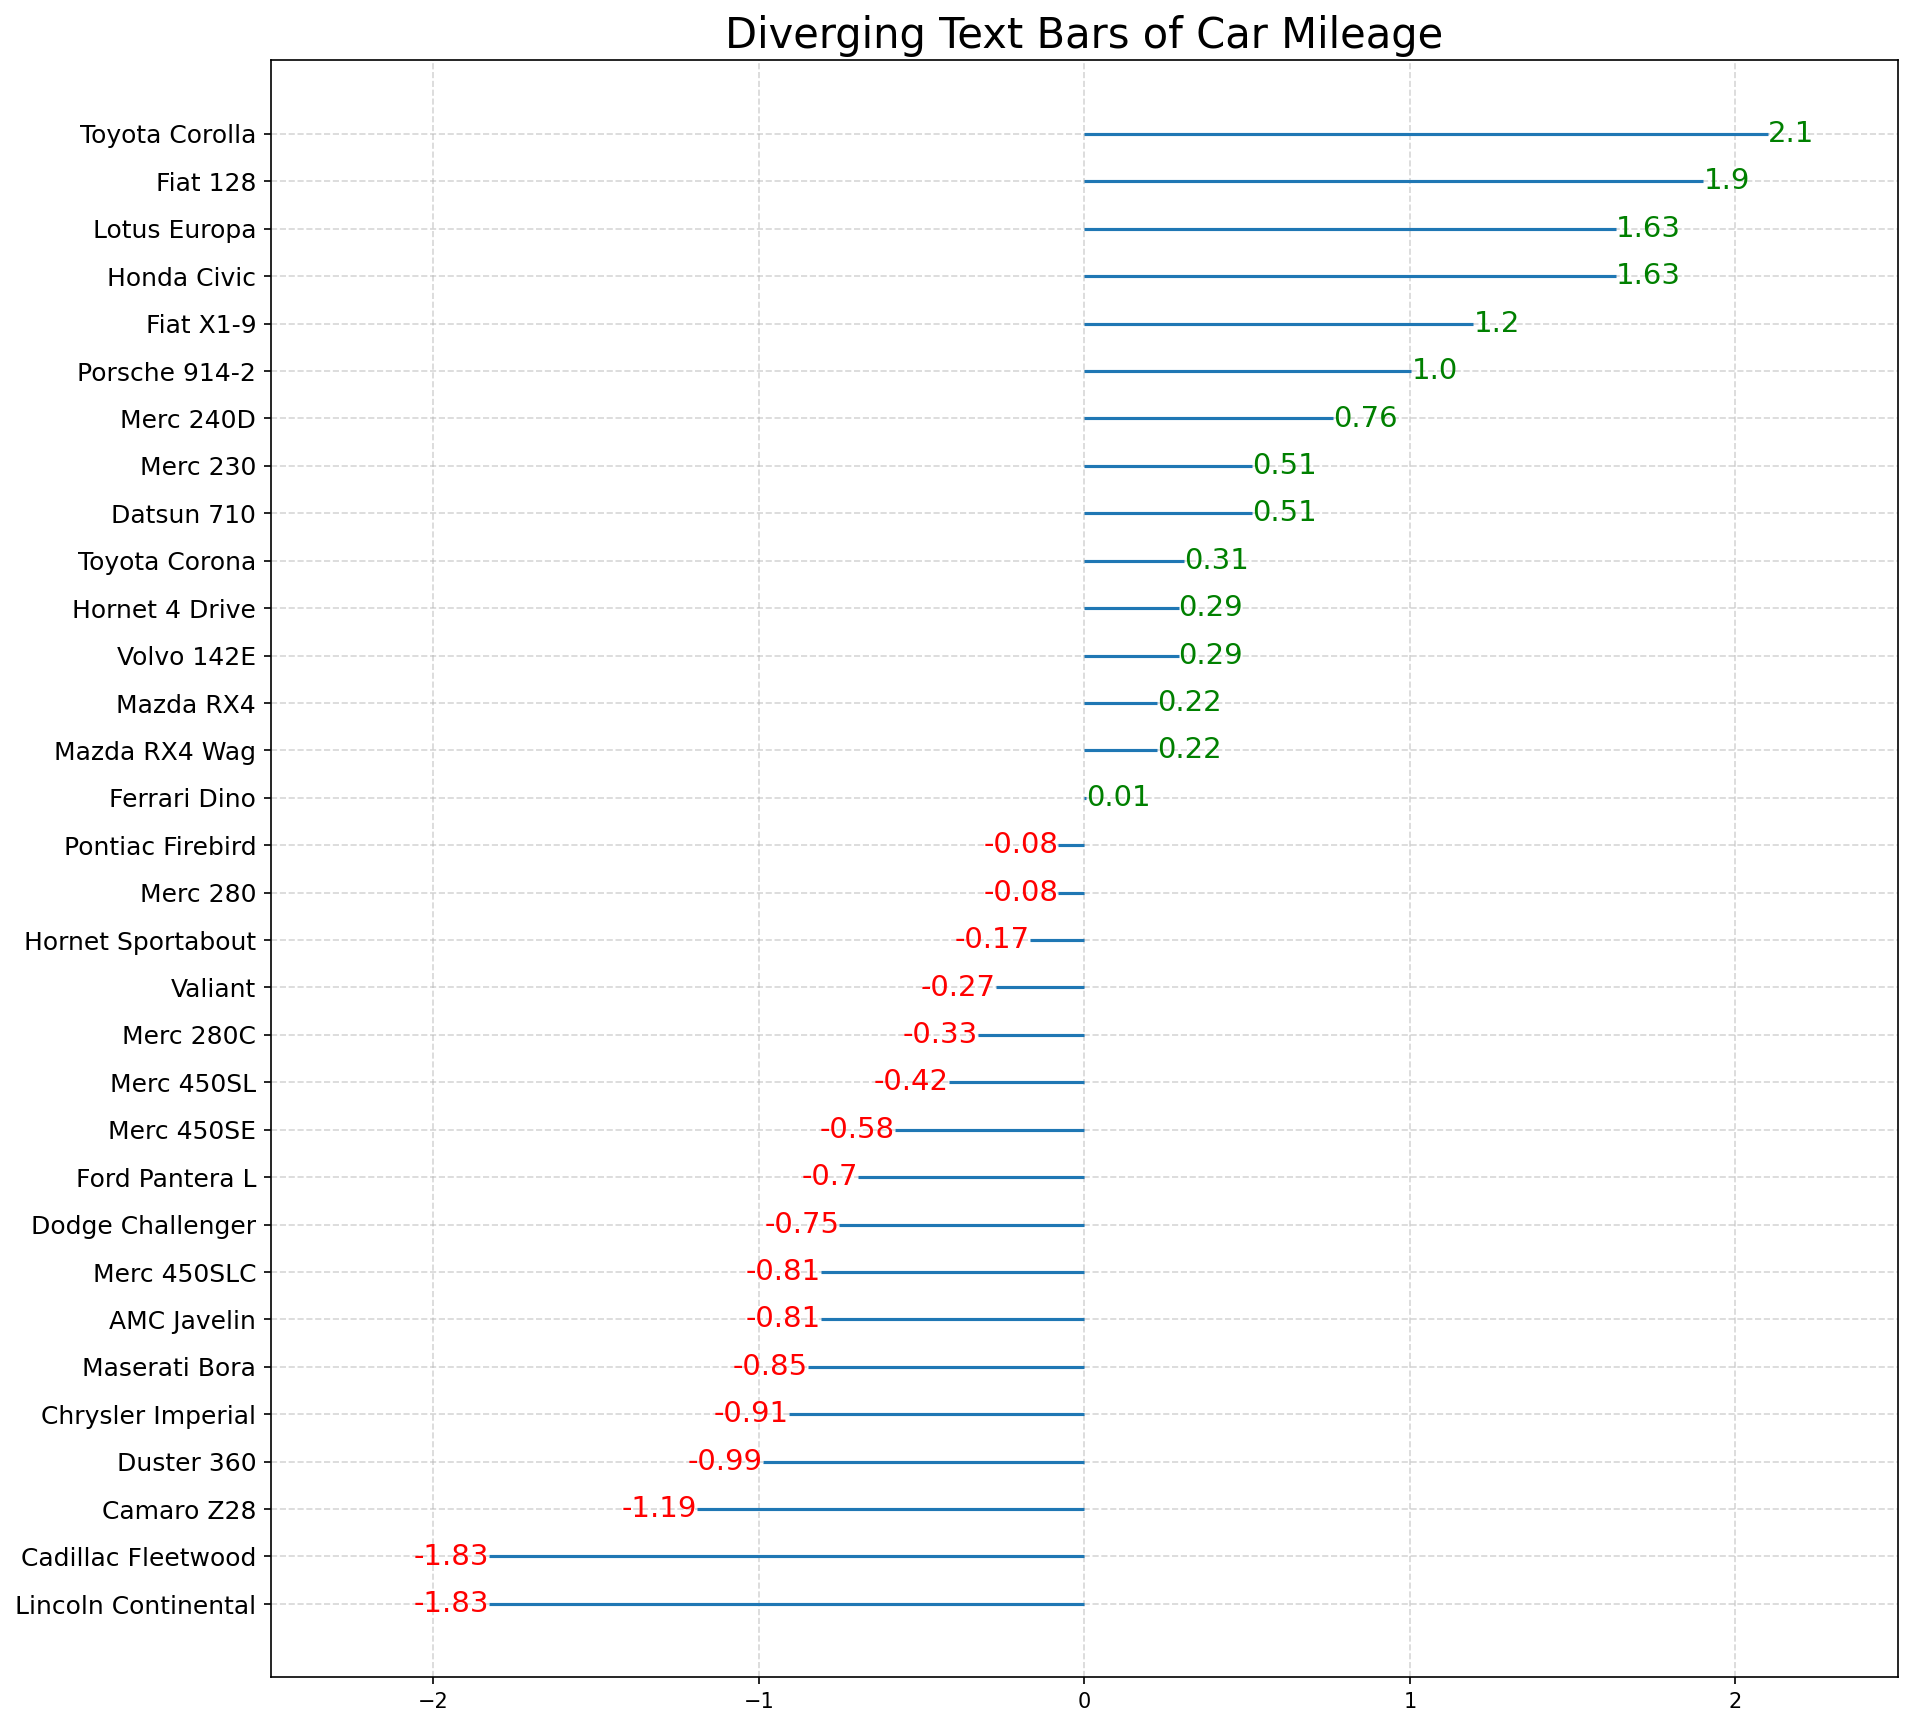

In [4]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,14), dpi= 150)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations    
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

### 12. Diverging Dot Plot
Divering dot plot is also similar to the diverging bars. However compared to diverging bars, the absence of bars reduces the amount of contrast and disparity between the groups.

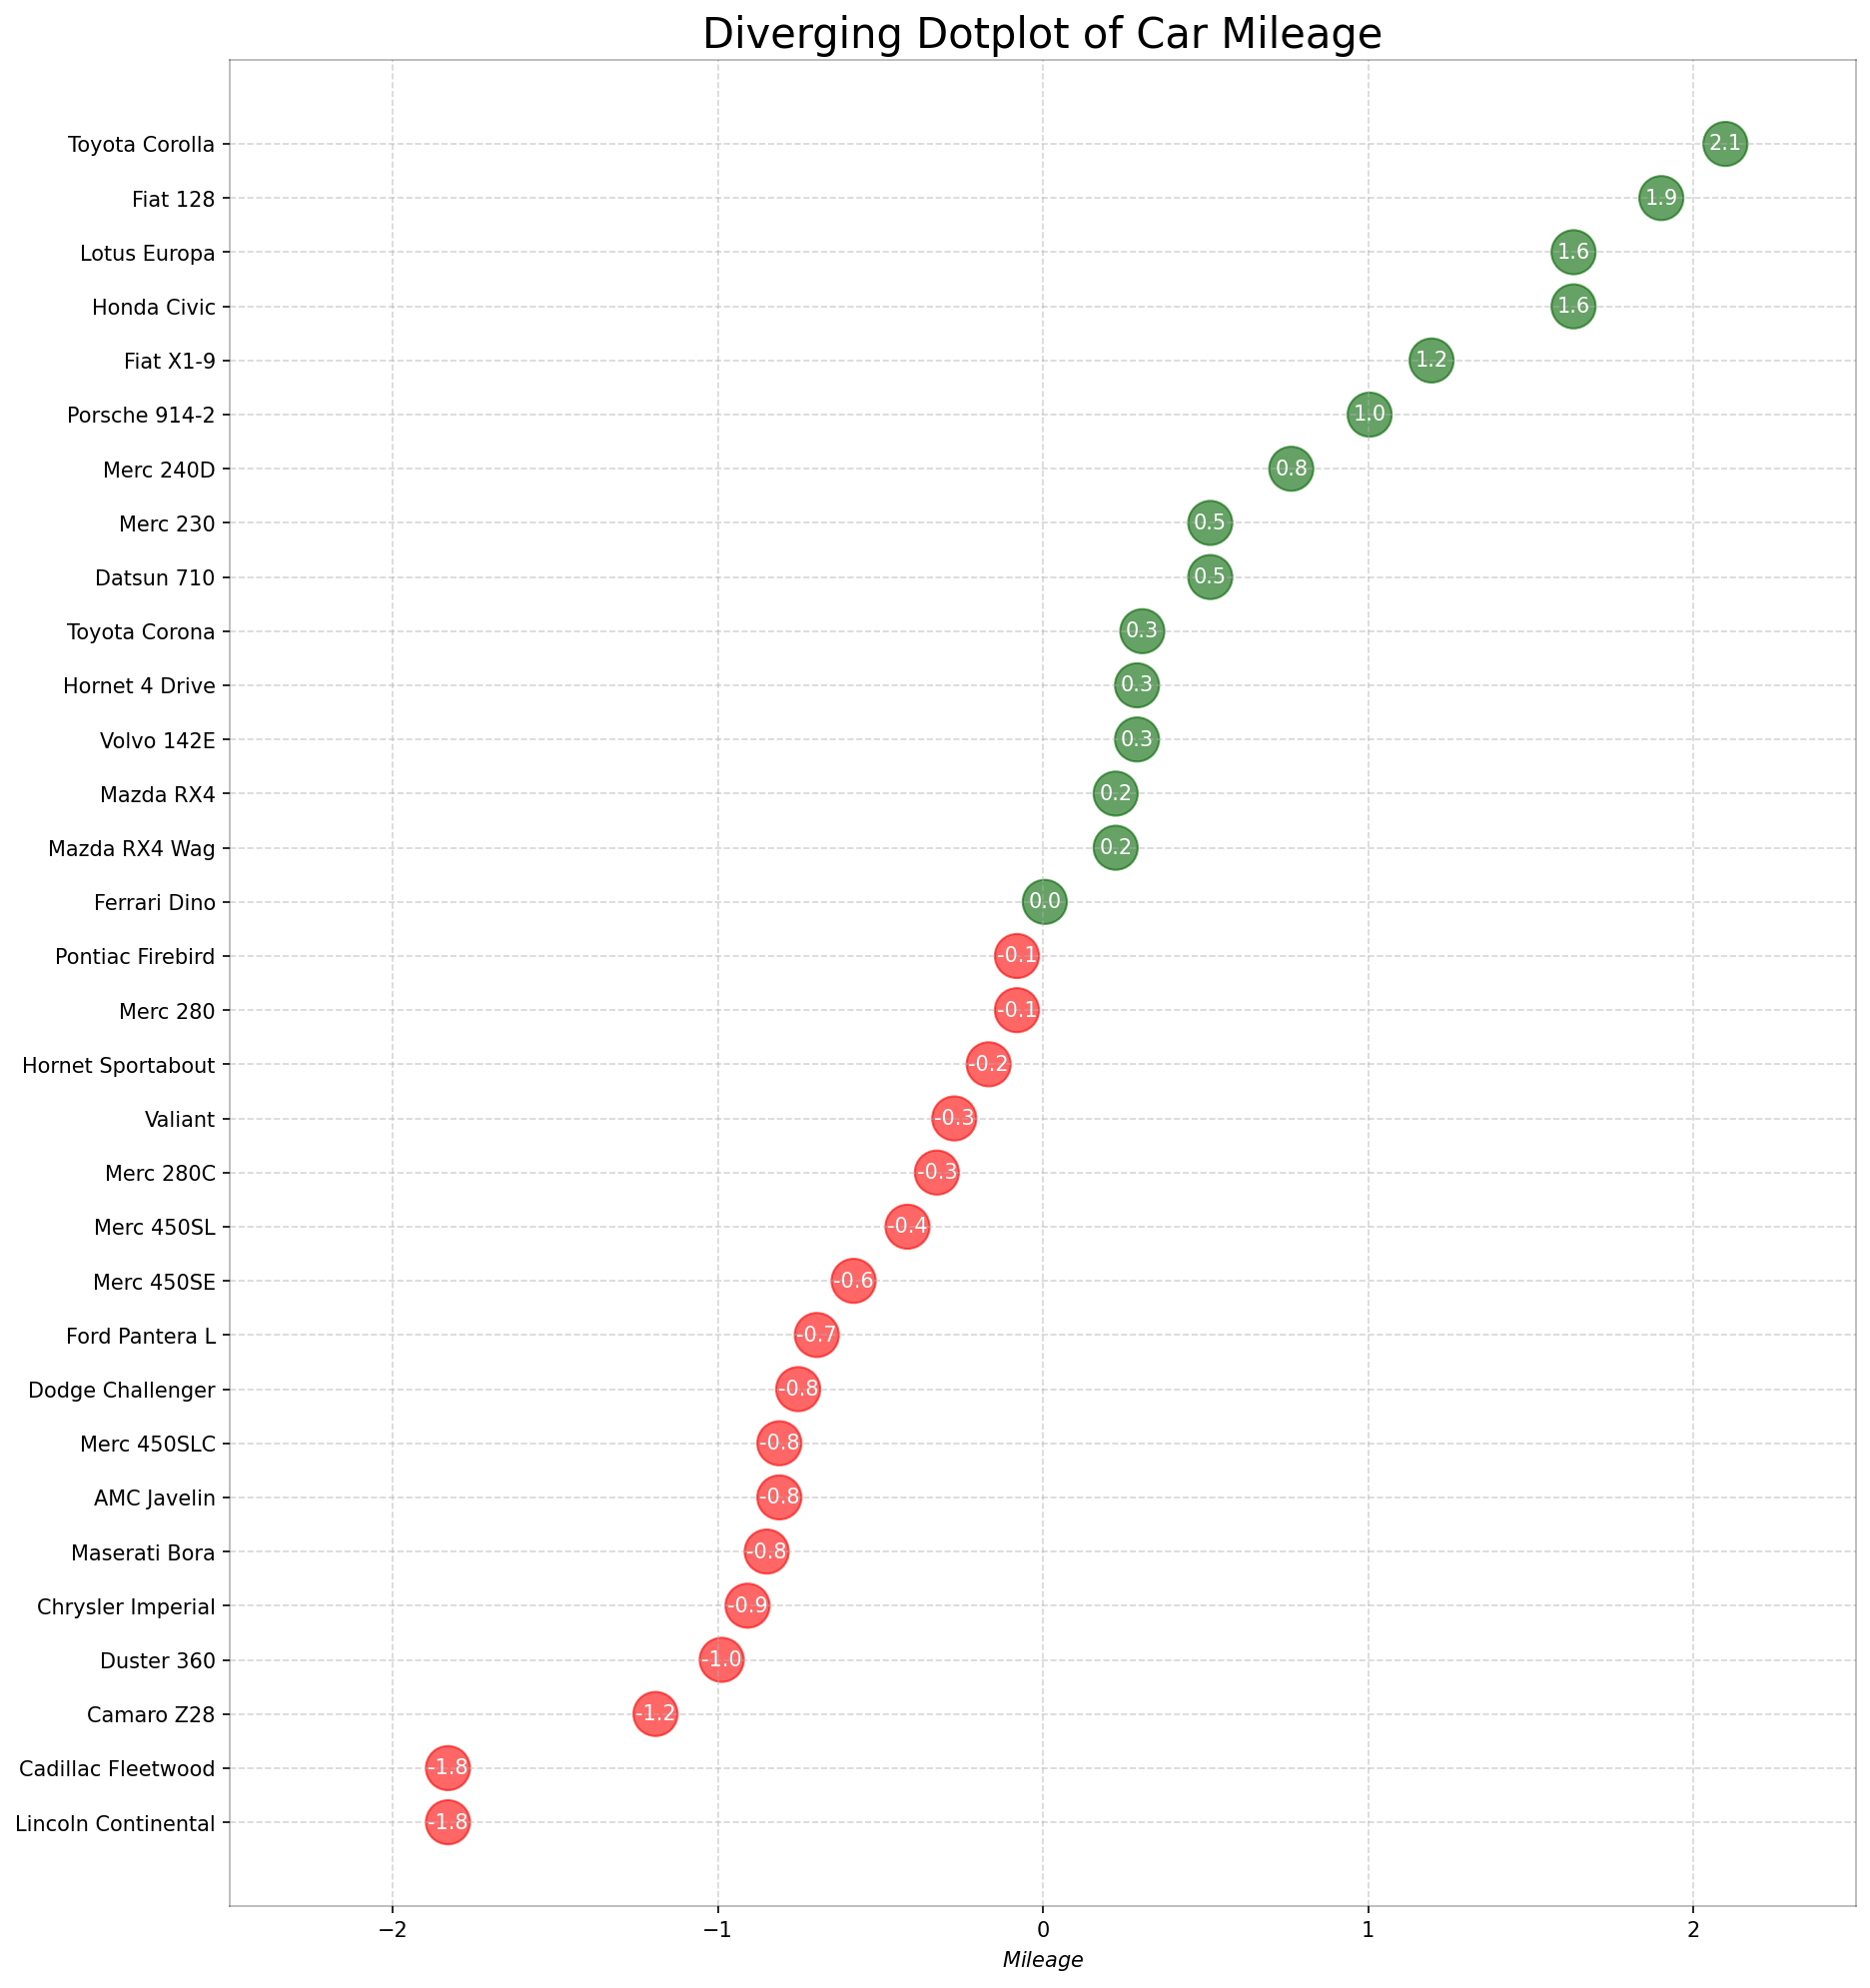

In [5]:


# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'darkgreen' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,16), dpi= 150)
plt.scatter(df.mpg_z, df.index, s=450, alpha=.6, color=df.colors)
for x, y, tex in zip(df.mpg_z, df.index, df.mpg_z):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.yticks(df.index, df.cars)
plt.title('Diverging Dotplot of Car Mileage', fontdict={'size':20})
plt.xlabel('$Mileage$')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()



### 13. Diverging Lollipop Chart with Markers
Lollipop with markers provides a flexible way of visualizing the divergence by laying emphasis on any significant datapoints you want to bring attention to and give reasoning within the chart appropriately.

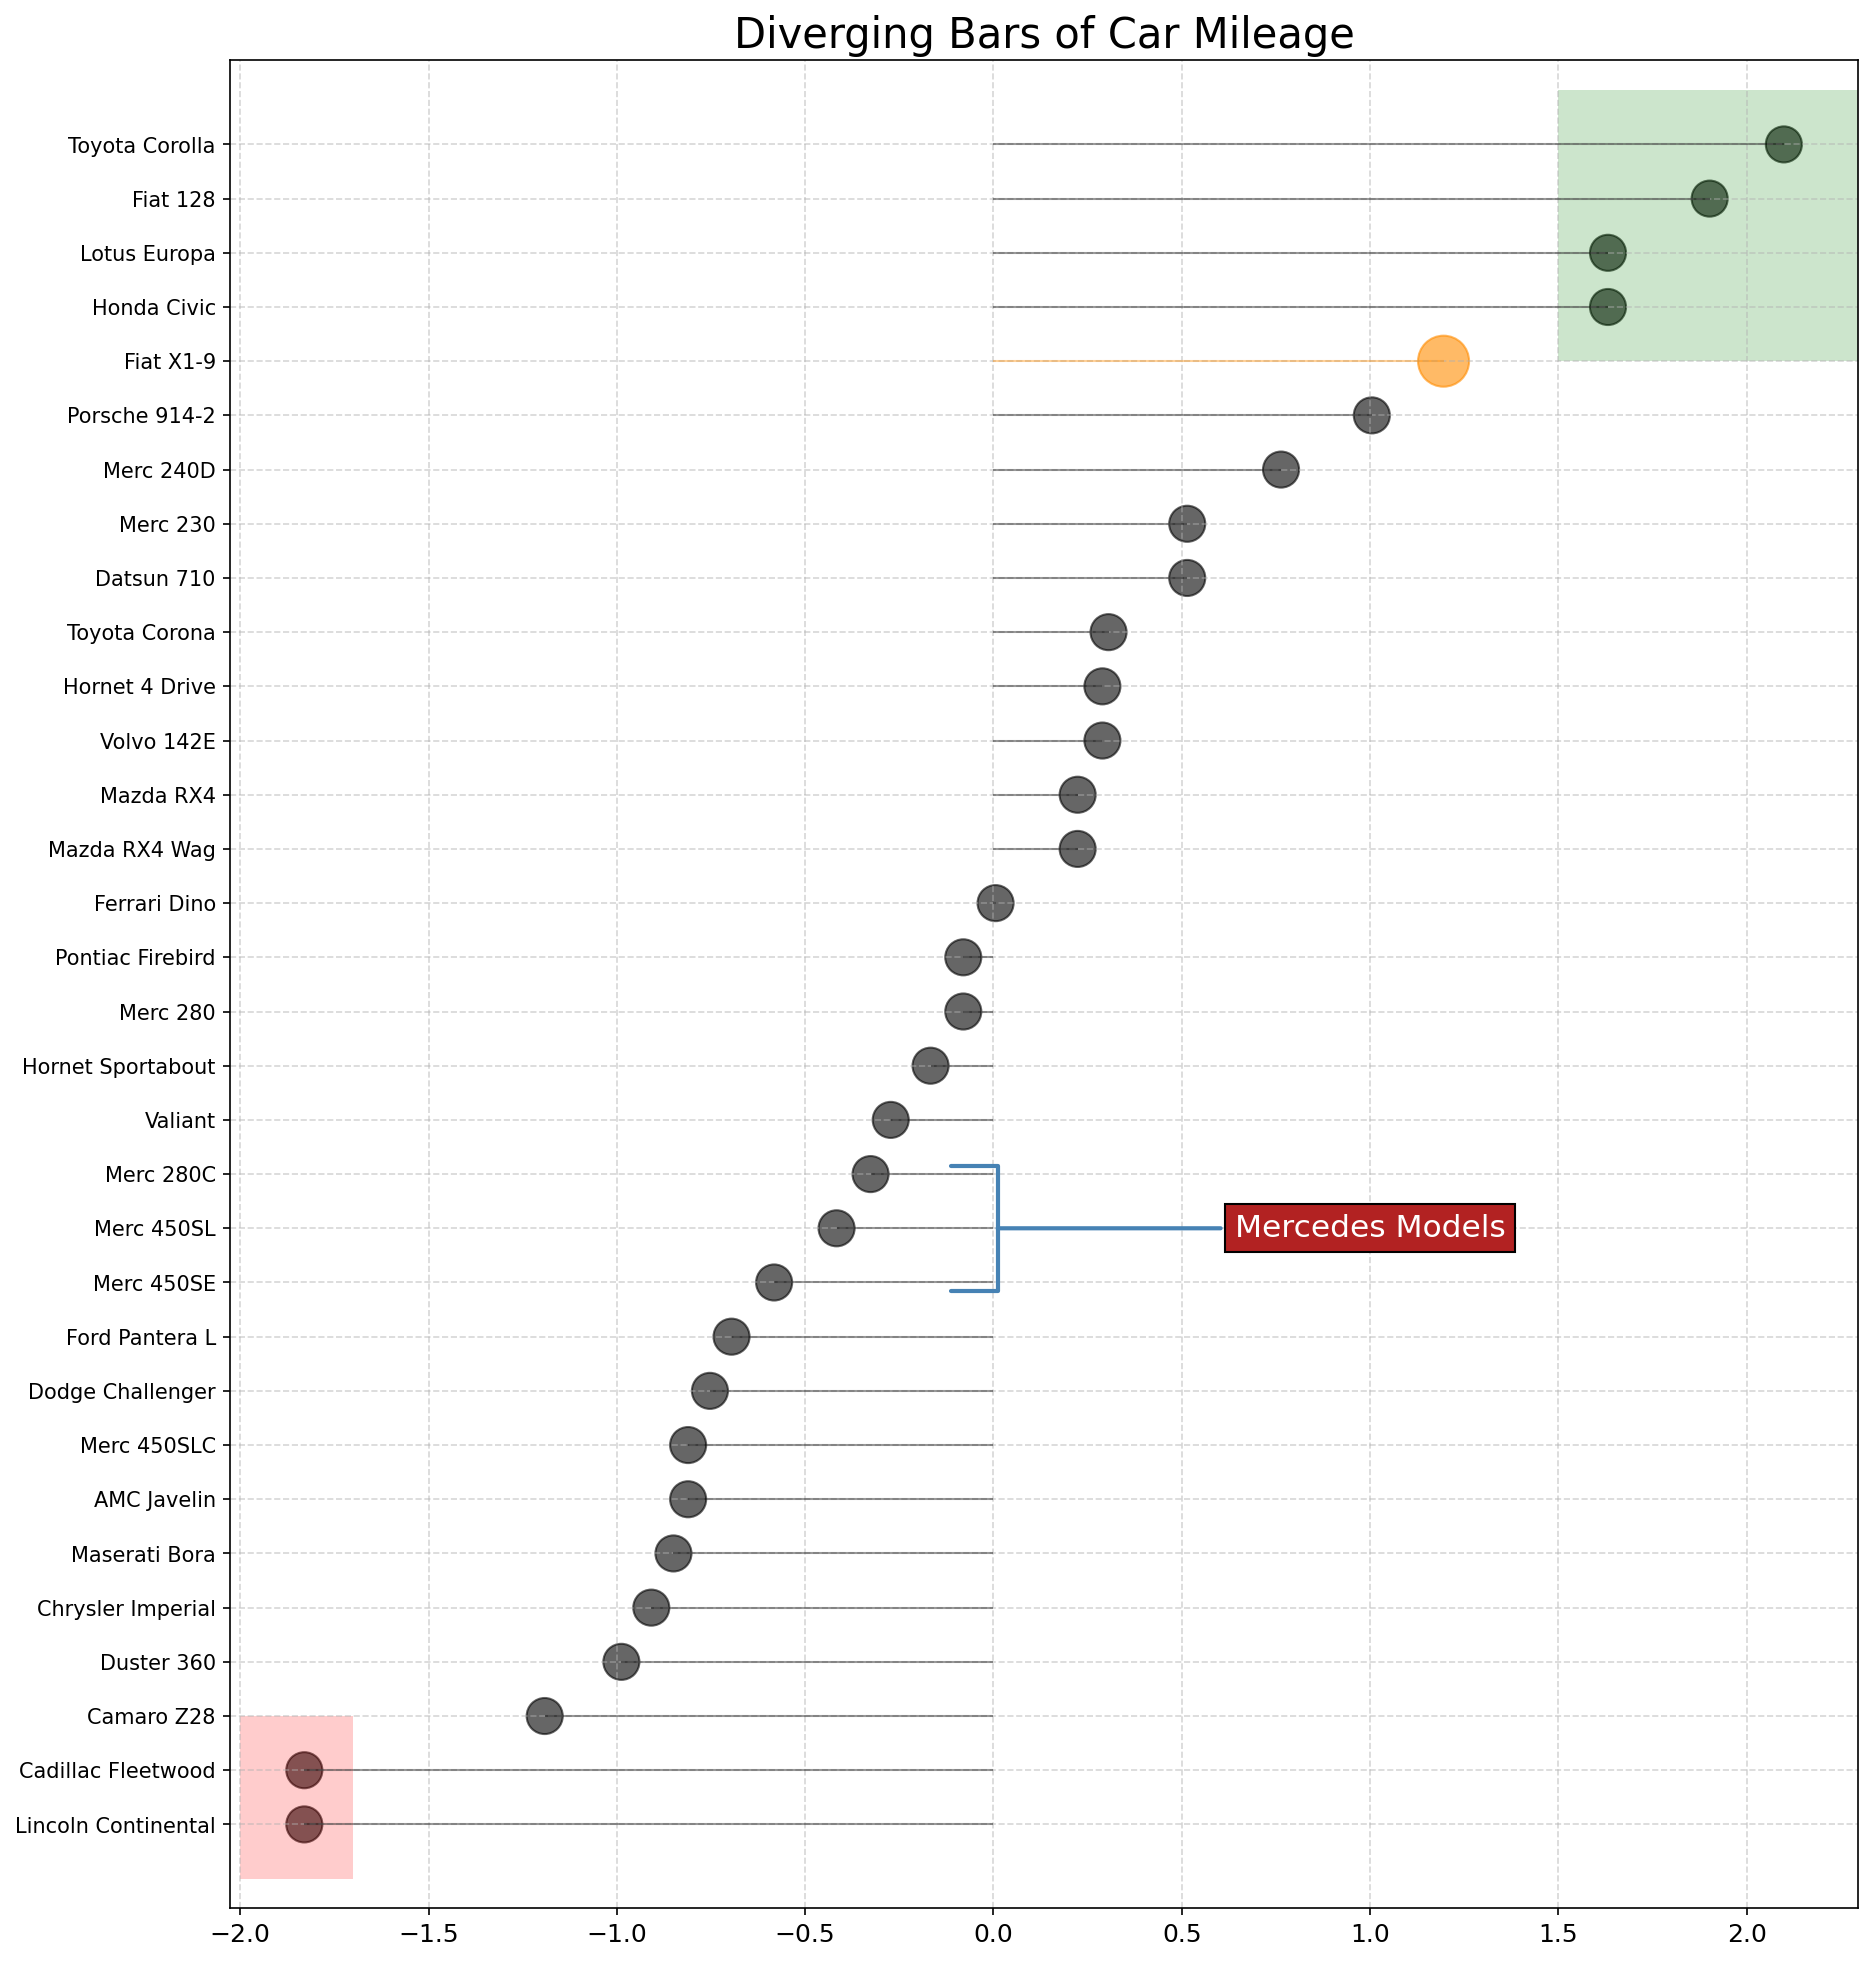

In [6]:


# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = 'black'

# color fiat differently
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)


# Draw plot
import matplotlib.patches as patches

plt.figure(figsize=(14,16), dpi= 150)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=1)
plt.scatter(df.mpg_z, df.index, color=df.colors, s=[600 if x == 'Fiat X1-9' else 300 for x in df.cars], alpha=0.6)
plt.yticks(df.index, df.cars)
plt.xticks(fontsize=12)

# Annotate
plt.annotate('Mercedes Models', xy=(0.0, 11.0), xytext=(1.0, 11), xycoords='data', 
            fontsize=15, ha='center', va='center',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5', lw=2.0, color='steelblue'), color='white')

# Add Patches
p1 = patches.Rectangle((-2.0, -1), width=.3, height=3, alpha=.2, facecolor='red')
p2 = patches.Rectangle((1.5, 27), width=.8, height=5, alpha=.2, facecolor='green')
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

# Decorate
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()



### 14. Area Chart
By coloring the area between the axis and the lines, the area chart throws more emphasis not just on the peaks and troughs but also the duration of the highs and lows. The longer the duration of the highs, the larger is the area under the line.

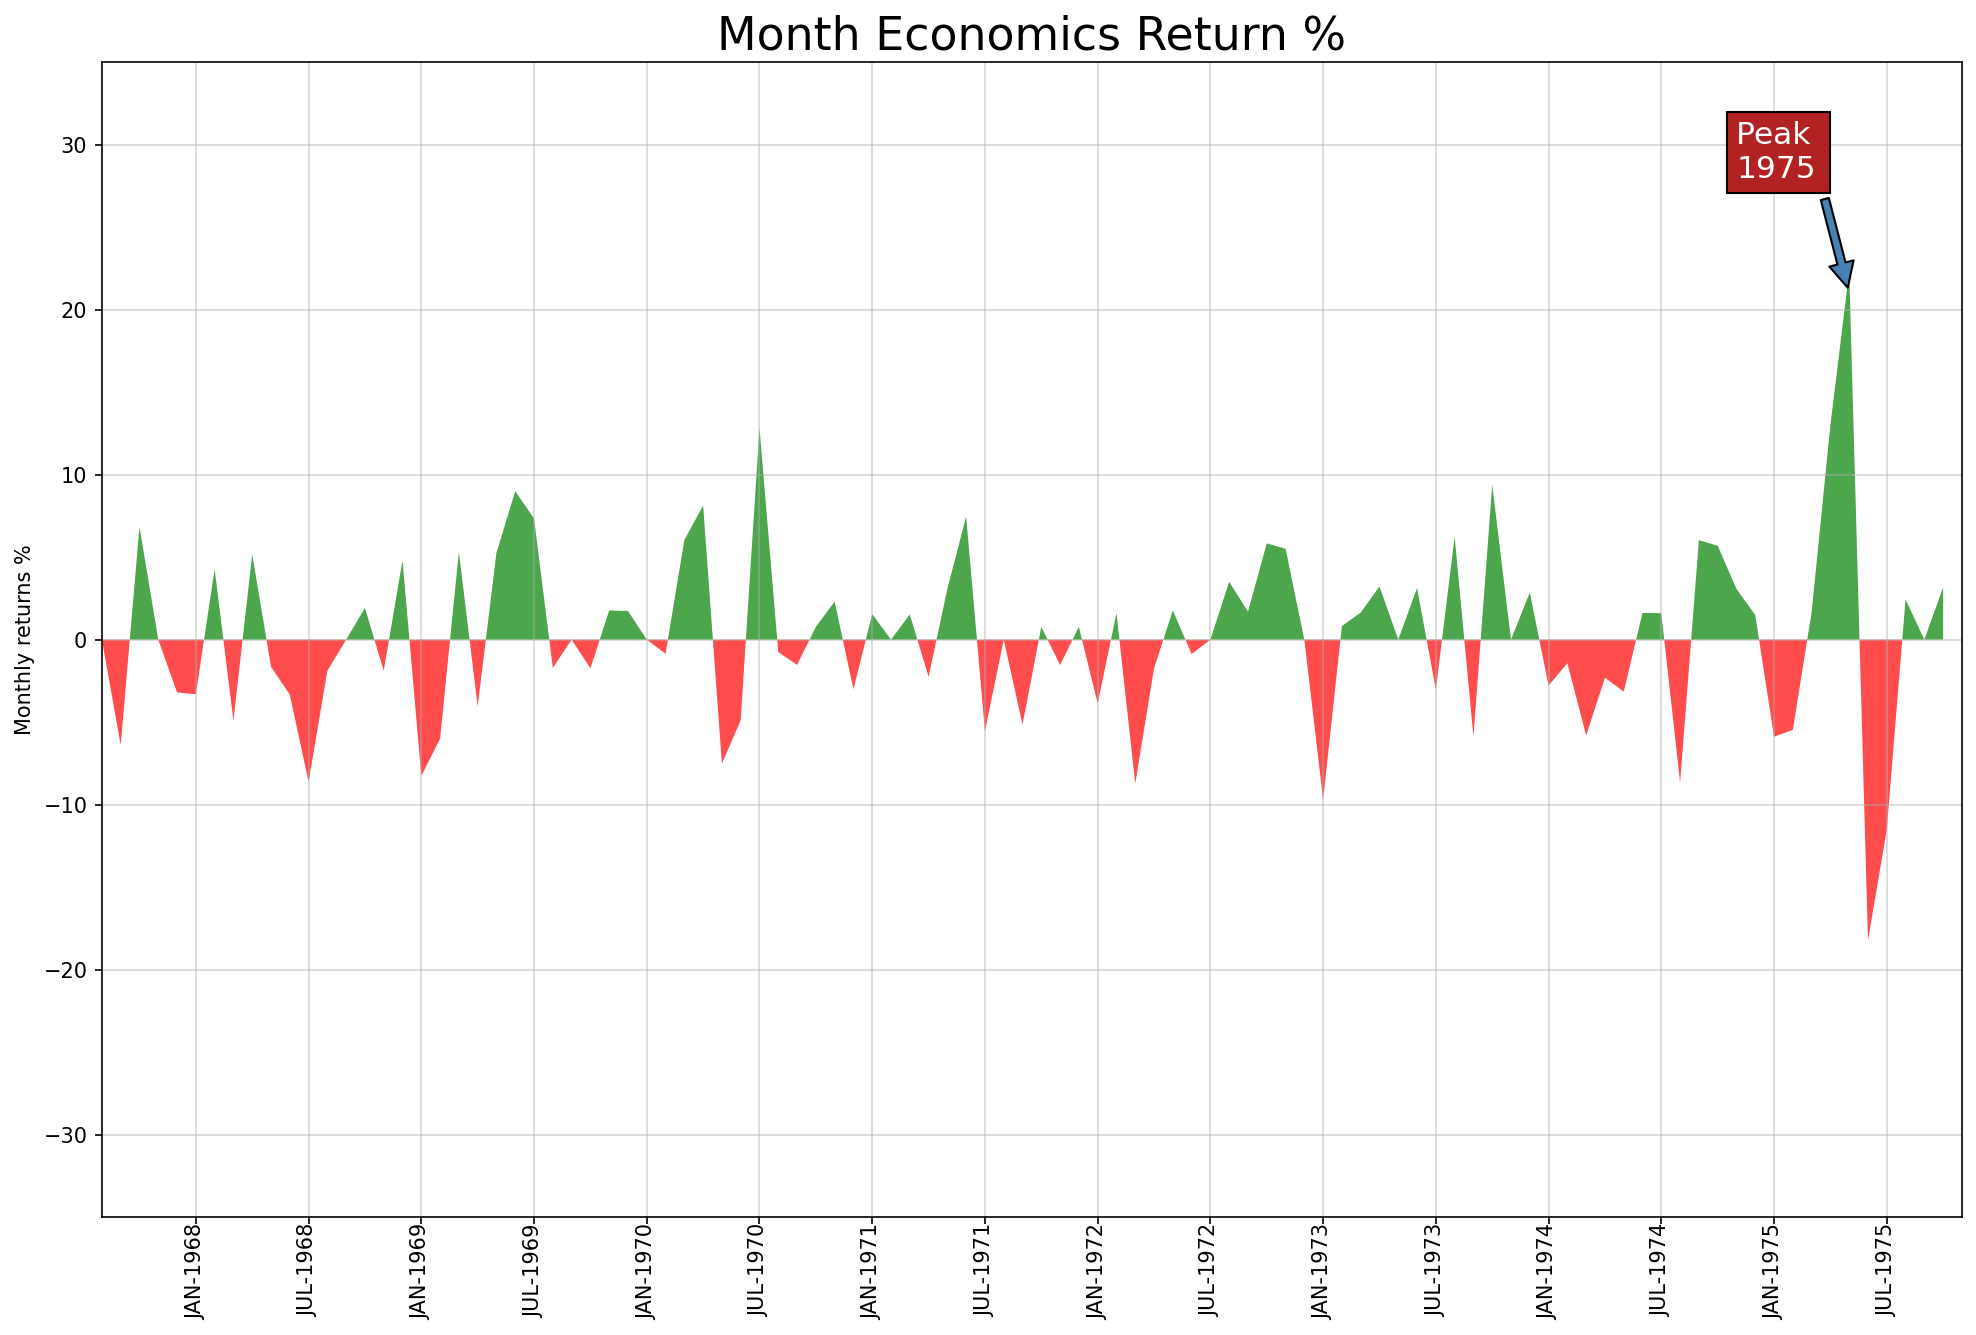

In [7]:
# Prepare Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff().fillna(0)/df.psavert.shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(16,10), dpi= 150)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')


# Decorations
xtickvals = [str(m)[:3].upper()+"-"+str(y) for y,m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35)
plt.xlim(1,100)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)
plt.show()